In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense  


In [3]:
red = pd.read_csv("redwinequality.csv", sep=";")
white = pd.read_csv("whitewinequality.csv", sep=";")
red['type'] = 1
white['type'] = 0

wines= pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)


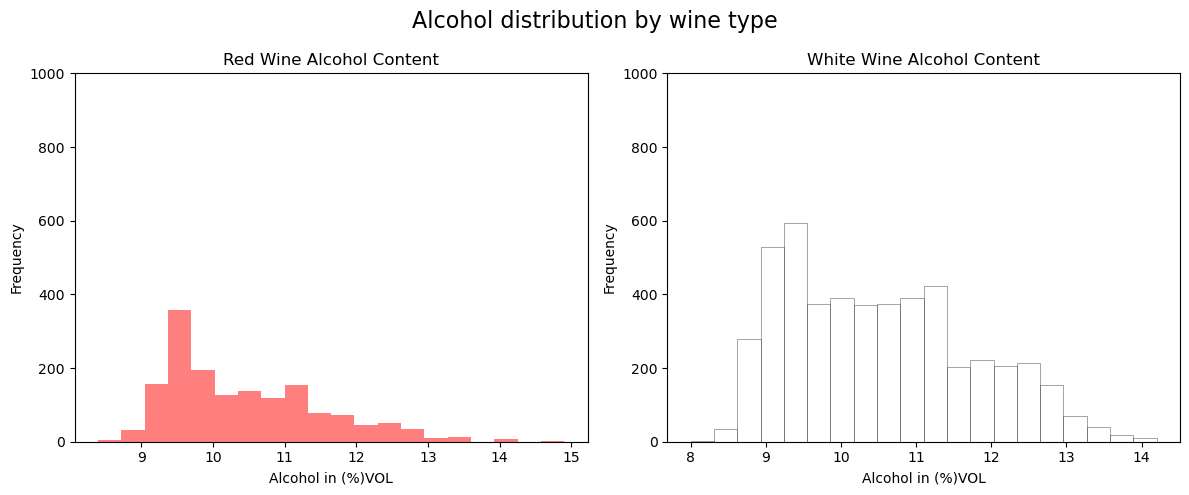

In [4]:
fig,ax=plt.subplots(1,2, figsize=(12,5))
ax[0].hist(wines[wines["type"]==1].alcohol, bins=20, facecolor='red', alpha=0.5, label='Red Wine')
ax[1].hist(wines[wines["type"]==0].alcohol,bins=20,facecolor='white',lw=0.5,alpha=0.5, edgecolor='black', label='White Wine')

for a in ax:
    a.set_ylim([0,1000])
    a.set_xlabel('Alcohol in (%)VOL')
    a.set_ylabel('Frequency')
    

ax[0].set_title('Red Wine Alcohol Content')
ax[1].set_title('White Wine Alcohol Content')

fig.suptitle('Alcohol distribution by wine type', fontsize=16)
plt.tight_layout()
plt.show()


In [5]:
X=wines.iloc[:,:-1]
y=wines["type"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
model=Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\saisi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 4s 626us/step - accuracy: 0.8643 - loss: 0.3081
Epoch 2/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 3s 610us/step - accuracy: 0.9393 - loss: 0.2175
Epoch 3/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 3s 597us/step - accuracy: 0.9433 - loss: 0.1854
Epoch 4/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 3s 623us/step - accuracy: 0.9526 - loss: 0.1551
Epoch 5/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 4s 696us/step - accuracy: 0.9559 - loss: 0.1328
Epoch 6/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 4s 838us/step - accuracy: 0.9703 - loss: 0.0960
Epoch 7/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 4s 803us/step - accuracy: 0.9716 - loss: 0.0880
Epoch 8/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 3s 625us/step - accuracy: 0.9663 - loss: 0.0970
Epoch 9/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 3s 646us/step - accuracy: 0.9733 - loss: 0.0890
Epoch 10/10
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 4s 681us/step - accuracy: 0.9763 - loss: 0.0706


In [8]:
y_pred = model.predict(X_test)

y_pred_labels = (y_pred >= 0.5).astype(int)

for prediction in y_pred_labels[:30]:
    wine_type = "Red wine" if prediction == 1 else "White wine"
    print(f"Prediction: {wine_type}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: Red wine


In [15]:
# Function to predict wine type from features
def predict_wine(features):
    """
    Predict wine type from a list of 12 features
    Input: list or array of 12 features
    Output: wine type prediction and confidence
    """
    # Convert to numpy array with correct shape
    wine_sample = np.array([features])
    
    # Make prediction
    prediction = model.predict(wine_sample, verbose=0)
    confidence = prediction[0][0]
    
    # Classify as red (1) or white (0)
    wine_type = "Red Wine" if confidence >= 0.5 else "White Wine"
    
    print(f"Prediction: {wine_type}")
    print(f"Confidence: {confidence:.4f}")
    return wine_type, confidence

predict_wine([7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4, 5])

predict_wine([6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5, 6])


Prediction: Red Wine
Confidence: 0.9994
Prediction: White Wine
Confidence: 0.0994


('White Wine', 0.09936734)

In [17]:
# Input wine features separated by semicolons
features_input = "7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5"

# Convert semicolons to commas and parse features
features_list = [float(x) for x in features_input.split(";")]

# Make prediction
print(f"Input features: {features_input}")
print(f"Parsed features: {features_list}\n")
predict_wine(features_list)



Input features: 7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
Parsed features: [7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8, 5.0]

Prediction: Red Wine
Confidence: 0.9995


('Red Wine', 0.9995412)